In [1]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, IndexedGraphs
using Statistics
using Plots, ColorSchemes, LaTeXStrings

In [211]:
T = 10^3
N = 50
k = 3
nsamples = 10^3;

In [212]:
# seed = 7111
seed = 1
gg = erdos_renyi(N, k/N; seed)
@show length(connected_components(gg))
g = IndexedGraph(gg)

w = map(1:N) do i
    ei = inedges(g, i)
    J = -ones(length(ei))
    fill(VoterFactor(J), T + 1)
end

bp = mpbp(IndexedBiDiGraph(gg), w, fill(2,N), T);

length(connected_components(gg)) = 4


In [213]:
m0 = [0.7, 0.8, 0.9] |> reverse

samplers = map(eachindex(m0)) do a
    m = m0[a]
    bp = mpbp(IndexedBiDiGraph(gg), w, fill(2,N), T)
    for i in eachindex(bp.ϕ)
        bp.ϕ[i][1] .= [(1+m)/2,(1-m)/2]
    end
    sms = sample(bp, nsamples; showprogress=false)
    println("Finished magnetiz $m ($a/$(length(m0)))")
    sms
end;

Finished magnetiz 0.9 (1/3)


Finished magnetiz 0.8 (2/3)


Finished magnetiz 0.7 (3/3)


In [214]:
spin(x, i) = 3 - 2x
magnetiz(sms) = mean(means(spin, sms))
m = [getproperty.(magnetiz(sms), :val) for sms in samplers];

Marginals from Soft Margin  12%|███                      |  ETA: 0:00:01

Marginals from Soft Margin  24%|██████                   |  ETA: 0:00:01

Marginals from Soft Margin  34%|████████▌                |  ETA: 0:00:01

Marginals from Soft Margin  44%|███████████              |  ETA: 0:00:01

Marginals from Soft Margin  56%|██████████████           |  ETA: 0:00:01

Marginals from Soft Margin  68%|█████████████████        |  ETA: 0:00:00

Marginals from Soft Margin  80%|████████████████████     |  ETA: 0:00:00

Marginals from Soft Margin  92%|███████████████████████  |  ETA: 0:00:00

Marginals from Soft Margin 100%|█████████████████████████| Time: 0:00:01


Marginals from Soft Margin  12%|███                      |  ETA: 0:00:01

Marginals from Soft Margin  24%|██████                   |  ETA: 0:00:01

Marginals from Soft Margin  36%|█████████                |  ETA: 0:00:01

Marginals from Soft Margin  48%|████████████             |  ETA: 0:00:01

Marginals from Soft Margin  60%|███████████████          |  ETA: 0:00:01

Marginals from Soft Margin  72%|██████████████████       |  ETA: 0:00:00

Marginals from Soft Margin  84%|█████████████████████    |  ETA: 0:00:00

Marginals from Soft Margin  96%|████████████████████████ |  ETA: 0:00:00

Marginals from Soft Margin 100%|█████████████████████████| Time: 0:00:01


Marginals from Soft Margin  12%|███                      |  ETA: 0:00:01

Marginals from Soft Margin  24%|██████                   |  ETA: 0:00:01

Marginals from Soft Margin  36%|█████████                |  ETA: 0:00:01

Marginals from Soft Margin  48%|████████████             |  ETA: 0:00:00

Marginals from Soft Margin  60%|███████████████          |  ETA: 0:00:00

Marginals from Soft Margin  72%|██████████████████       |  ETA: 0:00:00

Marginals from Soft Margin  80%|████████████████████     |  ETA: 0:00:00

Marginals from Soft Margin  92%|███████████████████████  |  ETA: 0:00:00

Marginals from Soft Margin 100%|█████████████████████████| Time: 0:00:00


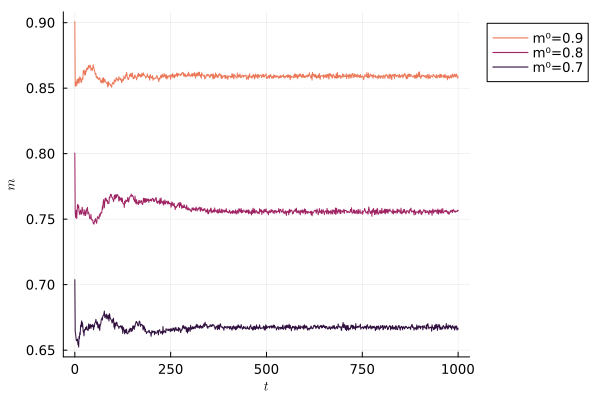

In [215]:
cg = cgrad(:matter, length(m0)+1, categorical=true)
pl = plot(xlabel=L"t", ylabel=L"m", legend=:outertopright)
for a in eachindex(samplers)
    plot!(pl, 0:T, m[a], label="m⁰=$(m0[a])", c=cg[a+1])
end
pl

In [216]:
spin(x) = spin(x, 0)

e = map(samplers) do sms
    pm = pair_marginals_alternate(sms; showprogress=false)
    ee = map(pm) do bij
        expectation.(spin, bij)
    end
    mean(ee)
end;

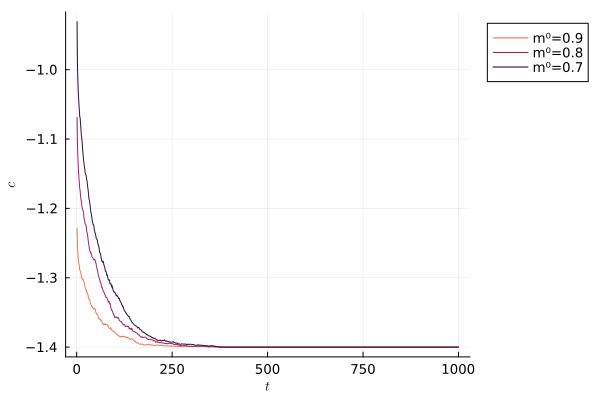

In [223]:
cg = cgrad(:matter, length(m0)+1, categorical=true)
ple = plot(xlabel=L"t", ylabel=L"c", legend=:outertopright)
for a in eachindex(samplers)
    plot!(ple, 1:T, -ne(gg)/N*e[a], label="m⁰=$(m0[a])", c=cg[a+1])
end
ple

In [221]:
ne(gg), 3/2*N

(70, 75.0)